Dataset shape: (150, 4) | Classes: ['setosa' 'versicolor' 'virginica']

Best Grid Search Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Grid CV Accuracy: 1.0

Best Randomized Search Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 15}
Randomized CV Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



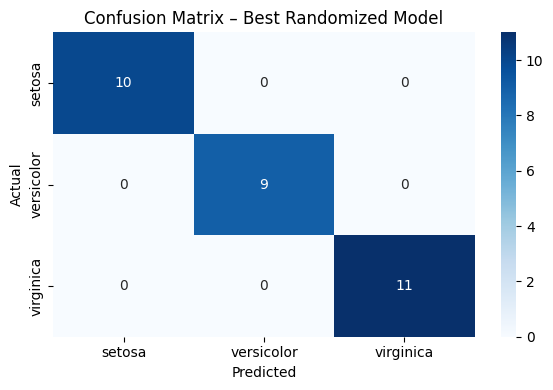

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


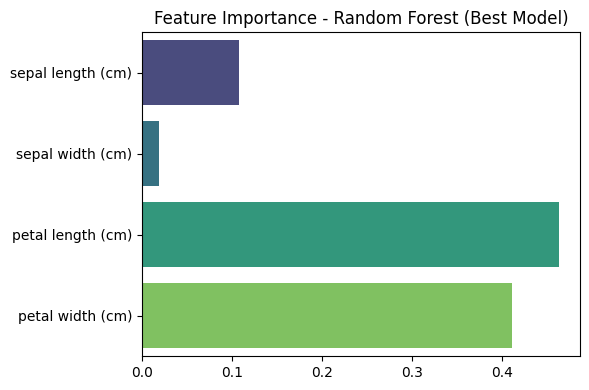

In [1]:
#  Hyperparameter Tuning Pipeline (Task 5 Complete)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load Data
iris = load_iris()
X, y = iris.data, iris.target
print("Dataset shape:", X.shape, "| Classes:", iris.target_names)

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Base Model
rf = RandomForestClassifier(random_state=42)

# 4. Grid Search for Hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}
grid = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)
print("\nBest Grid Search Parameters:", grid.best_params_)
print("Grid CV Accuracy:", grid.score(X_test, y_test))

# 5. Randomized Search
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10, 15]
}
rand = RandomizedSearchCV(rf, param_dist, n_iter=5, cv=5, scoring="accuracy", random_state=42)
rand.fit(X_train, y_train)
print("\nBest Randomized Search Parameters:", rand.best_params_)
print("Randomized CV Accuracy:", rand.score(X_test, y_test))

# 6. Final Evaluation
y_pred = rand.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix – Best Randomized Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 8. Feature Importance Plot
best_model = rand.best_estimator_
importances = best_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - Random Forest (Best Model)")
plt.tight_layout()
plt.show()
